In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import PIL 
import glob
from PIL import Image
import os ,sys
import batch
import tensorflow as tf

In [2]:
%matplotlib inline

In [3]:
lesserpanda= './sample_images/panda/' #사진 파일이 담겨져 있는 폴더
racoon = './sample_images/racoon/'
#panda folder에는 2개의 사진이 , racoon 파일에는 한개의 사진이 담겨져 있습니다.

In [4]:
src_folder_paths = [lesserpanda , racoon ];labels = [1,2]
#사진 파일이 담겨져 있는 path을 넘겨줍니다.
#라벨도 같이 넘겨줍니다, 
# lesserpanda 는 1 로 label 되고 
# racoon 폴더에 있는 사진은 2로 라벨됩니다
batch_=batch.batch(src_folder_paths ,labels)

#./sample_images/panda/:2
#./sample_images/racoon/:1
the number of total files :  3
the number of label files : : 3


In [5]:
batch_.make_tfrecord_rawdata('./sample_images/sample_2.tfrecord')
#만약 tfrecord 파일이 만들어 져 있다면 위 함수를 건너 뜁니다 
#tfrecored 파일을 만듭니다. tfrecord 파일이 만들어질 위치를 지정해 주세요!

./sample_images/sample_2.tfrecordis exists


In [6]:
tfrecord_path ='./sample_images/sample_2.tfrecord'
images , labels  = batch.get_shuffled_batch(tfrecord_path,  3 , (224,224))
# 3은 batch_size 입니다 , (224,224)는 복원될 이미지 사이즈 입니다. 
# tf.bilinear라는 lib을 써서 작은 사진도 224,224로 복원됩니다. 
init_op=tf.group(tf.global_variables_initializer() ,  tf.local_variables_initializer())
sess= tf.Session()
sess.run(init_op)
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess= sess, coord =coord)
for i in xrange(3):
    batch_xs , batch_ys=imgs,labs=sess.run([images , labels])
    #batch_xs ,batch_ys 을 이용하면 됩니다.
    print np.shape(batch_xs)
    print batch_ys
coord.request_stop()
coord.join(threads)

(3, 224, 224, 3)
[1 2 1]
(3, 224, 224, 3)
[2 1 1]
(3, 224, 224, 3)
[1 1 2]


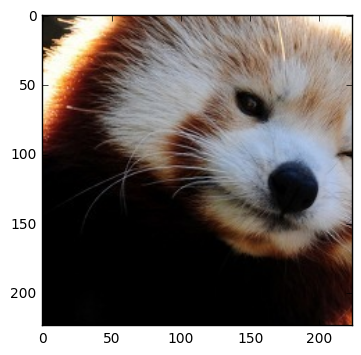

In [7]:
plt.imshow(batch_xs[0])